In [91]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
img = cv2.imread('../images_dataset/lionel_messi/1211643746.jpg.0.jpg')
img.shape

(800, 1200, 3)

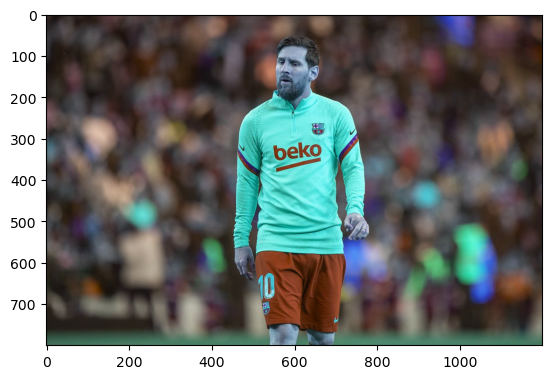

In [93]:
plt.imshow(img)

In [94]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(800, 1200)

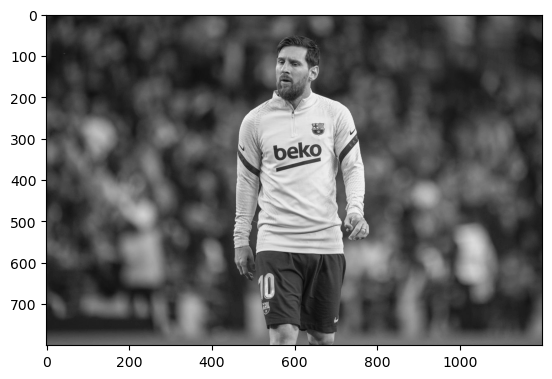

In [95]:
plt.imshow(gray, cmap='gray')

# Documentation: 
<!-- create a link -->
* [Face Detection using Haar Cascades](https://opencv2-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html#face-detection)
* [Documentation](https://opencv2-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_tutorials.html)

__Downloading the haarcascade classifier from opencv github__

[link](https://github.com/opencv/opencv/tree/4.x/data/haarcascades)


###  Now how do you detect face and eyes?

In [96]:
face_cascade = cv2.CascadeClassifier('../opencv/haarcascades/haarcascade_frontalface_default.xml')
eyes_cascade = cv2.CascadeClassifier('../opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces
# OUTPUT:
# array([[534,  78, 102, 102]]) # x, y, w, h

array([[534,  78, 102, 102]])

In [97]:
# getting the face region
x, y, w, h = faces[0]
x, y, w, h

(534, 78, 102, 102)

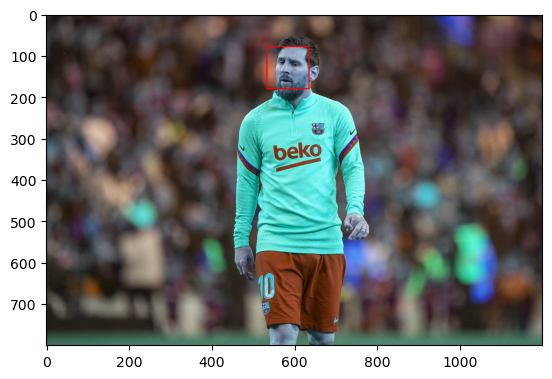

In [98]:
# cropping the face region
face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(face_img)

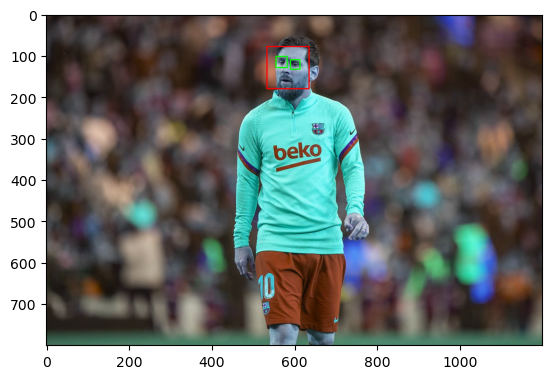

In [99]:
cv2.destroyAllWindows()
for (x, y, w, h) in faces:
    face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eyes_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

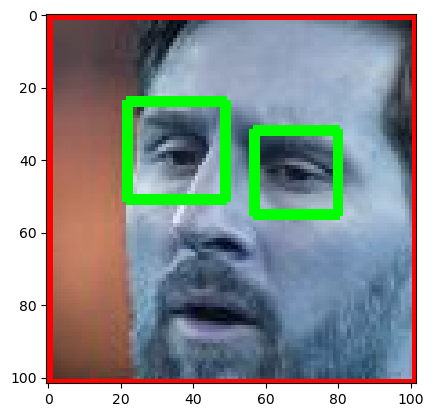

In [100]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')
# plt.imshow(roi_gray, cmap='gray')

In [101]:
supported_formats = (".jpg", ".jpeg", ".png", ".bmp")

# Function to crop image if two eyes are detected


def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Failed to load image at {image_path}")
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eyes_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
    return None

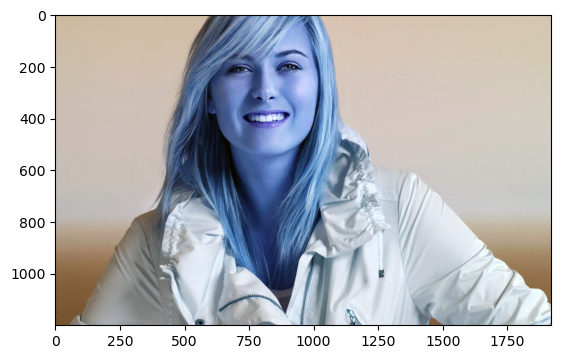

In [102]:
img_path = '../images_dataset/maria_sharapova/maria-sharapova-2013-beautiful_1920x1200_99155.jpg'
original_image = cv2.imread(img_path)
plt.imshow(original_image)

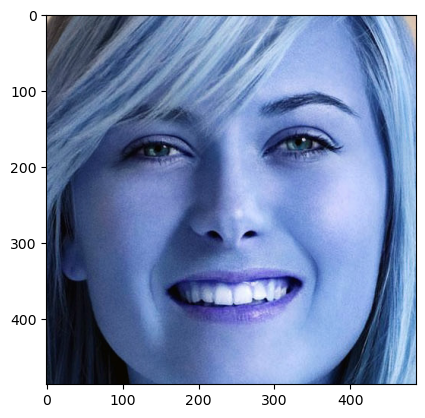

In [103]:
cropped_image = get_cropped_image_if_2_eyes(img_path)
plt.imshow(cropped_image)

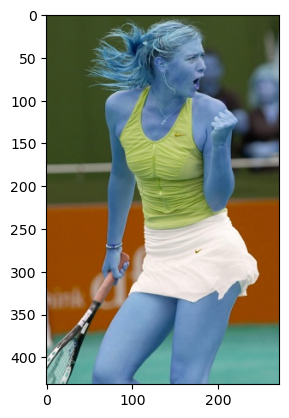

In [104]:
img_path = '../images_dataset/maria_sharapova/mariasharapova-6-272x432.jpg'
original_image = cv2.imread(img_path)
plt.imshow(original_image)
# face not clear

In [105]:
cropped_image = get_cropped_image_if_2_eyes(img_path)
# plt.imshow(cropped_image)

In [106]:
path_to_data = "../images_dataset/"
path_to_cr_data = "../images_dataset/cropped/"

In [ ]:
import os
img_dirs = [entry.path for entry in os.scandir(path_to_data) if entry.is_dir()]

# for entry in os.scandir(path_to_data):
#     if entry.is_dir():
#         img_dirs.append(entry.path)
# print(img_dirs)
# ['../images_dataset/lionel_messi', '../images_dataset/maria_sharapova']

In [108]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [ ]:
cropped_image_dir = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(f"Processing images for: {celebrity_name}")
    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        # Only process supported image files
        if entry.is_file() and entry.path.lower().endswith(supported_formats):
            roi_color = get_cropped_image_if_2_eyes(entry.path)
            if roi_color is not None:
                cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dir.append(cropped_folder)
                    print("Generating cropped images in folder:", cropped_folder)

                cropped_file_name = f"{celebrity_name}_{count}.png"
                cropped_file_path = os.path.join(cropped_folder, cropped_file_name)

                cv2.imwrite(cropped_file_path, roi_color)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count += 1

Processing images for: cropped
Processing images for: lionel_messi
Generating cropped images in folder: ../images_dataset/cropped/lionel_messi
Processing images for: maria_sharapova
Generating cropped images in folder: ../images_dataset/cropped/maria_sharapova
Processing images for: roger_federer
Generating cropped images in folder: ../images_dataset/cropped/roger_federer
Processing images for: serena_williams
Generating cropped images in folder: ../images_dataset/cropped/serena_williams
Failed to load image at ../images_dataset/serena_williams\uUa6x3eXf3__zFaIfjkC0QysTGUwuhWOWoYEAUTunGv70HZ-UXA62U0sGCPucHm4pqxqPQWinZiXVNLmZFcZ6RF9aL8cZ5_kZGD0kziwbD16kWk1WWK5e39OyAPwaHjIzGqtAshq-1920x1080.png
Processing images for: virat_kohli
Generating cropped images in folder: ../images_dataset/cropped/virat_kohli
